# Exercise: Metabolic Data Analysis and Visualization with Python

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
# loading the dataset
def load_data():
    df=pd.read_csv('metabolic_dataset.csv')
    return df

In [24]:
# Handaling missing values
def handle_missing_values(df):
    df.Concentration.isnull().sum() # Check the number of missing values in the Concentration column
    df['Concentration'] = df.groupby(['Metabolite', 'Condition'])['Concentration'] \
                            .transform(lambda miss: miss.fillna(miss.median())) # Fill missing values with the median of each group
    return df


In [26]:
def standardize_units(df):
    convert=df['Units'] == 'mM'
    df.loc[convert,'Concentration'] = df.loc[convert, 'Concentration'] * 1000# multiply by 1000 to concentration
    df.loc[convert, 'Units'] = 'μM'# change units to μM
    return df

In [15]:
summary = df.groupby(['Metabolite', 'Condition'])['Concentration'].agg(mean='mean',median='median',std='std') # Compute the mean, median, and standard deviation and saved in the summary
summary # print the summary


mean      median        std
Metabolite   Condition                                   
Metabolite1  Control     80.324499   80.281301   4.464336
             Treatment   75.972781   74.719990   2.521949
Metabolite10 Control     49.972248   62.048568  27.913156
             Treatment   83.550176   82.007579   6.702451
Metabolite2  Control     47.753149   47.547589   4.269419
             Treatment   49.955735   50.356504   6.000106
Metabolite3  Control     20.517690   19.783831   2.788214
             Treatment   43.169796   42.719539   6.465101
Metabolite4  Control     50.866943   52.060923   3.847219
             Treatment   39.371322   47.604860  22.458558
Metabolite5  Control     31.109111   49.177155  28.448005
             Treatment   53.651424   54.218082   3.945831
Metabolite6  Control     23.607715   23.453450   5.674057
             Treatment   26.432982   25.621681   4.091046
Metabolite7  Control    108.053252  150.000000  57.759273
             Treatment   30.999066   29.971337   4.404233
Metabolite8  Control     19.397235   24.186280  13.240828
             Treatment   15.518996   22.980484  14.336476
Metabolite9  Control     46.036095   46.291889   1.238437
             Treatment   27.215106   43.523241  24.849609

In [16]:
mean=df.groupby(['Metabolite', 'Condition'])['Concentration'].mean() # Group by Metabolite and Condition, then calculate mean Concentration
mean # print the summary

Metabolite    Condition
Metabolite1   Control       80.324499
              Treatment     75.972781
Metabolite10  Control       49.972248
              Treatment     83.550176
Metabolite2   Control       47.753149
              Treatment     49.955735
Metabolite3   Control       20.517690
              Treatment     43.169796
Metabolite4   Control       50.866943
              Treatment     39.371322
Metabolite5   Control       31.109111
              Treatment     53.651424
Metabolite6   Control       23.607715
              Treatment     26.432982
Metabolite7   Control      108.053252
              Treatment     30.999066
Metabolite8   Control       19.397235
              Treatment     15.518996
Metabolite9   Control       46.036095
              Treatment     27.215106
Name: Concentration, dtype: float64

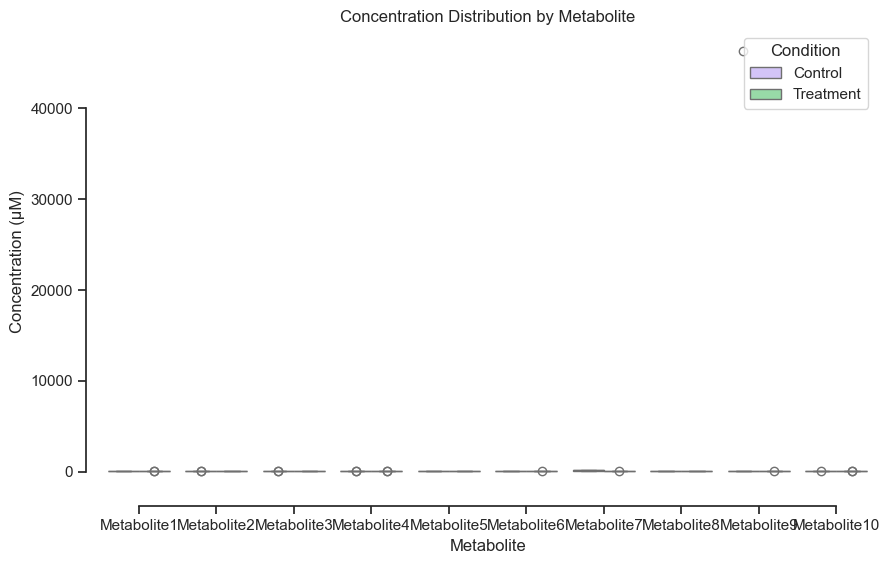

In [29]:
# making boxplot using seaborn
sns.set_style("whitegrid") # set the background as whitegrid
sns.set_theme(style="ticks", palette="pastel") # this step is setting color and style 
plt.figure(figsize=(10,6)) # setting size of the figure
sns.boxplot(data=df,x='Metabolite',y='Concentration',hue="Condition", palette=["m", "g"]) # making boxplot with seaborn
sns.despine(offset=10, trim=True) # 
plt.title("Concentration Distribution by Metabolite")
plt.xlabel('Metabolite')
plt.ylabel('Concentration (μM)')
plt.show()
plt.savefig("concentration_boxplot.png", dpi=300)
plt.close()


C:\Users\PC\AppData\Local\Temp\ipykernel_20732\3894014847.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



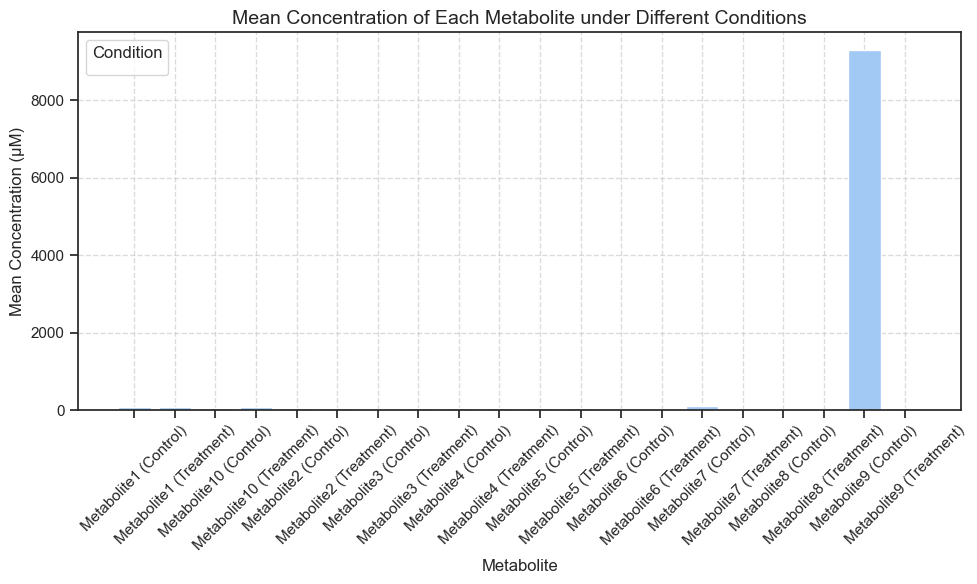

In [39]:
# making  bar plot 
plt.figure(figsize=(10, 6))  # setting size of the figure
mean = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().reset_index()
labels = mean['Metabolite'] + " (" + mean['Condition'] + ")"
plt.bar(labels, mean['Concentration'])# creating bar plot
plt.grid(True, linestyle='--', alpha=0.7) # adding grid to the plot
plt.title('Mean Concentration of Each Metabolite under Different Conditions',fontsize=14) # adding title to the plot
plt.xticks(rotation=45)
plt.ylabel('Mean Concentration (μM)',fontsize=12)
plt.xlabel('Metabolite',fontsize=12)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()
plt.close()

In [30]:
# making interactive graph through Plotly
metabolite='Metabolite3'
filter_df=df[df['Metabolite']==metabolite]
fig = px.line(
    filter_df,
    x='Replicate',
    y='Concentration',
    color='Condition',
    markers=True,
    title=f'Concentration Trends Across Replicates for {metabolite}'
)
fig.update_layout(
    xaxis_title='Replicate',
    yaxis_title='Concentration (μM)',
    hovermode='x unified'
)
fig.show()

In [33]:
df=load_data()
df.head()

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM


In [34]:
df=handle_missing_values(df)

In [35]:
df=standardize_units(df)